・ライブラリのインポート

・TensorFlowでAIモデルを作成する

・Gradioで画像認識アプリにする

# ライブラリのインポート

In [1]:
%pip install -q gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import gradio as gr

print(tf.__version__)

2.11.0


In [3]:
tf.get_logger().setLevel('ERROR')

TensorFlowでAIモデルを作成する

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

・学習データ：60000枚

・テストデータ:10000枚

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

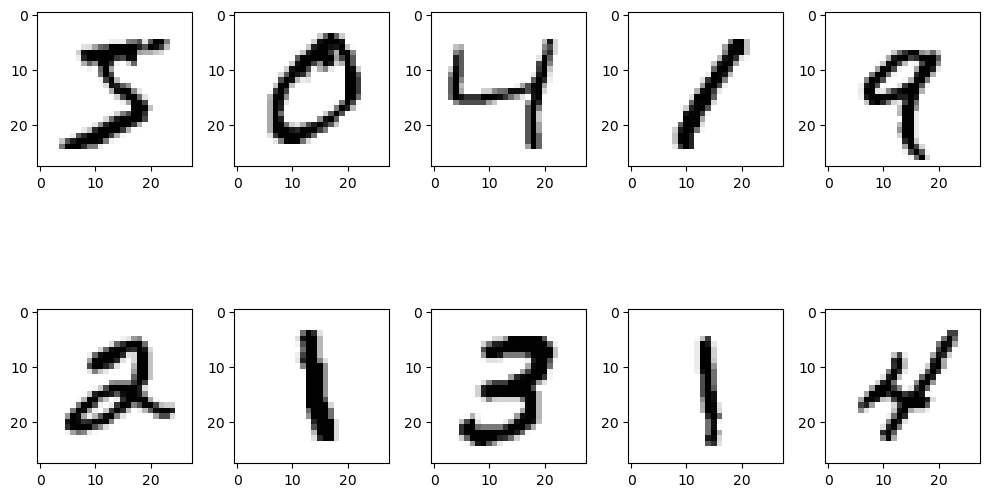

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10), tight_layout=True)

n=0
for i in range(2):
    for j in range(5):
        #グラフ表示
        ax[i][j].imshow(x_train[n], cmap=plt.cm.binary)
        n += 1

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2578 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1133 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0786 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0573 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0448 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - lo

In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print(test_loss)
print(test_acc)

0.07957866787910461
0.9781000018119812


In [12]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


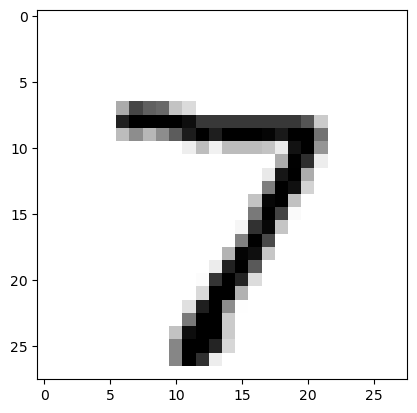

In [13]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
pass

In [14]:
import numpy as np

np.argmax(predictions[0])

7

# Gradioで画像認識アプリにする

In [17]:
def recognize_digit(img):
    img = img.reshape(1, 28, 28)
    prediction = model.predict(img).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label()
interface = gr.Interface(fn=recognize_digit, inputs='sketchpad',outputs=label, live=False, title='Digit Recognizer')

c:\Users\sugay\Anaconda3\envs\neuralnetwork\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\sugay\Anaconda3\envs\neuralnetwork\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [18]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861

Could not create share link, please check your internet connection.


1/1 [==============================] - 0s 65ms/step
